# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 5. Проверка статистических гипотез и коэффициенты корреляции
### Дедлайн --- 19 декабря 23:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

In [71]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'

**Данная домашка будет посвящена проверке гипотез. До этого мы с Вами успешно научились строить точечные, доверительные и вариационные (байесовские) оценки. Такие оценки хорошо себя показывают в задачах с численным ответом, где есть допустимая ошибка и в машинном обучении, где параметр не является основной целью (а сама задача состоит в генерации новых данных или поиска зависимости в имеющихся (и генерации ответа по входу). Теперь обратимся к задачам, в которых нужно дать строгий бинарный ответ да/нет. Заметим, что насколько бы хорошими не были свойства оценок, они почти наверное численно не совпадают с истинным значением параметра, так что бинарный ответ по ним построить сложно. В проверке гипотез же ответ точный, и дозволяется ошибиться с ограниченной вероятностью**

**Внимание! Гипотезу в рамках анализа можно либо отвергнуть, либо не отвергнуть, но ни в коем случае нельзя принять, так как в теории оценивается только вероятность ошибки 1 рода, но не 2! Всегда учитывайте возможность того, что используете недостаточно мощный критерий (как в жизни). Так что фраза "гипотеза принимается" является грубейшей ошибкой, и следует говорить "гипотеза не отвергается". За фразу "гипотеза принимается" решение будет обнуляться без права на аппеляцию.**

Если не сказано иного, критерий нужно написать **самостоятельно**.

## Задача 1 (20 баллов)

Данная задача посвящена критериям согласия. В прошлой домашке мы увидели, что в большой части теории статистики требуется предположение о нормальности. Нормальное распределение --- самая привычная для практики вещь, так что на практике часто делается ошибка --- нормальность полагается без проверки. Но как проверять нормальность? Мы делали это при помощи QQ-plot и "глазами", что, конечно же, является моветоном.

Предлагаем Вам реализовать и протестировать некоторые продвинутые способы проверки.

Так как задача проверки нормальности с неизвестными параметрами достаточно сложная, мы остановимся на нормальности с нулевым средним и единичной дисперсией.

Во всех пунктах нужно описать критерий, промоделировать нормальные выборки и проверить, что вероятность отвержения нормальности для нормальной выборки не превосходит теоретической вероятности 0.05 (во всех задачах будем брать такой уровень значимости).

##Критерий Стьюдента

1. Вспомните (или посмотрите на Википедии) определение распределения Стьюдента с параметром. Как оно ведёт себя с ростом параметра? Что будет происходить с p-value критериев проверки нормальности и с гипотезой о нормальности с ростом параметра (будет ли она отвергаться чаще или нет)?

Ответ:

Плотность распределения Стьюдента с параметром $\nu$ имеет вид $\dfrac{\Gamma\lr{{\frac{\nu+1}{2}}}}{\sqrt{\nu \pi}\cdot\Gamma\lr{{\frac{\nu}{2}}}}\lr{1 + \frac{x^2}{\nu}}^{-\frac{\nu+1}{2}}$
При $\nu\tends\infty$ оно принимает вид вид стандартного нормального распределения $\mathcal{N}(0,1)$


Какой минимальный k -- параметр распределения Стьюдента, при котором гипотеза о нормальности перестаёт отвергаться?

In [72]:
alpha = 0.05
n = 10000
normal = sps.norm(loc=0, scale=1)
student = sps.t
def p_value(samples):
    nX = (n ** 0.5) * samples.mean()
    quantile = normal.cdf(nX)
    return 2 * min(quantile, 1 - quantile)

k = 1
while p_value(student.rvs(df=k, size=n)) < alpha:
    k += 1
print(k)

3


##Критерий согласия Колмогорова.

2.1 Вспомните прошлые домашки и сформулируйте теорему Гливенко-Кантелли, а именно часть о поведении статистики $\sqrt{n}D_n$. Постройте по этой теореме критерий согласия Колмогорова вида: если некоторая выборочная статистика попадает в некоторый интервал с конечными (квантили распределения Колмогорова) или бесконечными границами, то гипотеза отвергается.

2.2

Промоделируйте поведение статистики $\sqrt{n}D_n$ для достаточно большого (1000+) n. Посчитайте выборочные квантили, которые Вам потребуются для критерия.

In [73]:
from math import sqrt
N = 1000
size = 10000
sample = normal.rvs(size=(N, size))

def statistic(samples, cdf):
    sorted_samples = np.sort(samples, axis=1)
    probs = cdf(sorted_samples)
    sample_size = samples.shape[1]
    ecdf = np.arange(1, sample_size + 1)
    
    D_minus = np.max(ecdf / sample_size - probs, axis=1)
    D_plus = np.max(probs - (ecdf - 1) / sample_size, axis=1)
    statistics = np.max(np.vstack([D_minus, D_minus]), axis=0) * sqrt(sample_size)
    return statistics


stat = statistic(sample, normal.cdf)
quantile = np.percentile(stat, q=(1 - alpha) * 100)
print(f"95%-квантиль распределения Колмогорова из statistic: {quantile}")
quantile_scipy = sps.ksone.ppf(1 - alpha, n=size) * sqrt(size)
print(f"95%-квантиль распределения Колмогорова из scipy: {quantile_scipy}")

2.3 Сгенерируйте 1000 нормальных выборок размера 100 и посмотрите, как часто критерий отвергает гипотезу.

In [74]:
sample_size = 100 
samples = normal.rvs((N, sample_size))
D = statistic(samples, normal.cdf)
reject_freq = np.sum(D > quantile) / N

print(f"гипотеза о нормальности распределения отвергается в {reject_freq} случаях")

2.4 Найдите такой максимальный параметр распределения Стьюдента k, при котором гипотеза о нормальности перестаёт отвергаться.

NameError: name 'statistic' is not defined

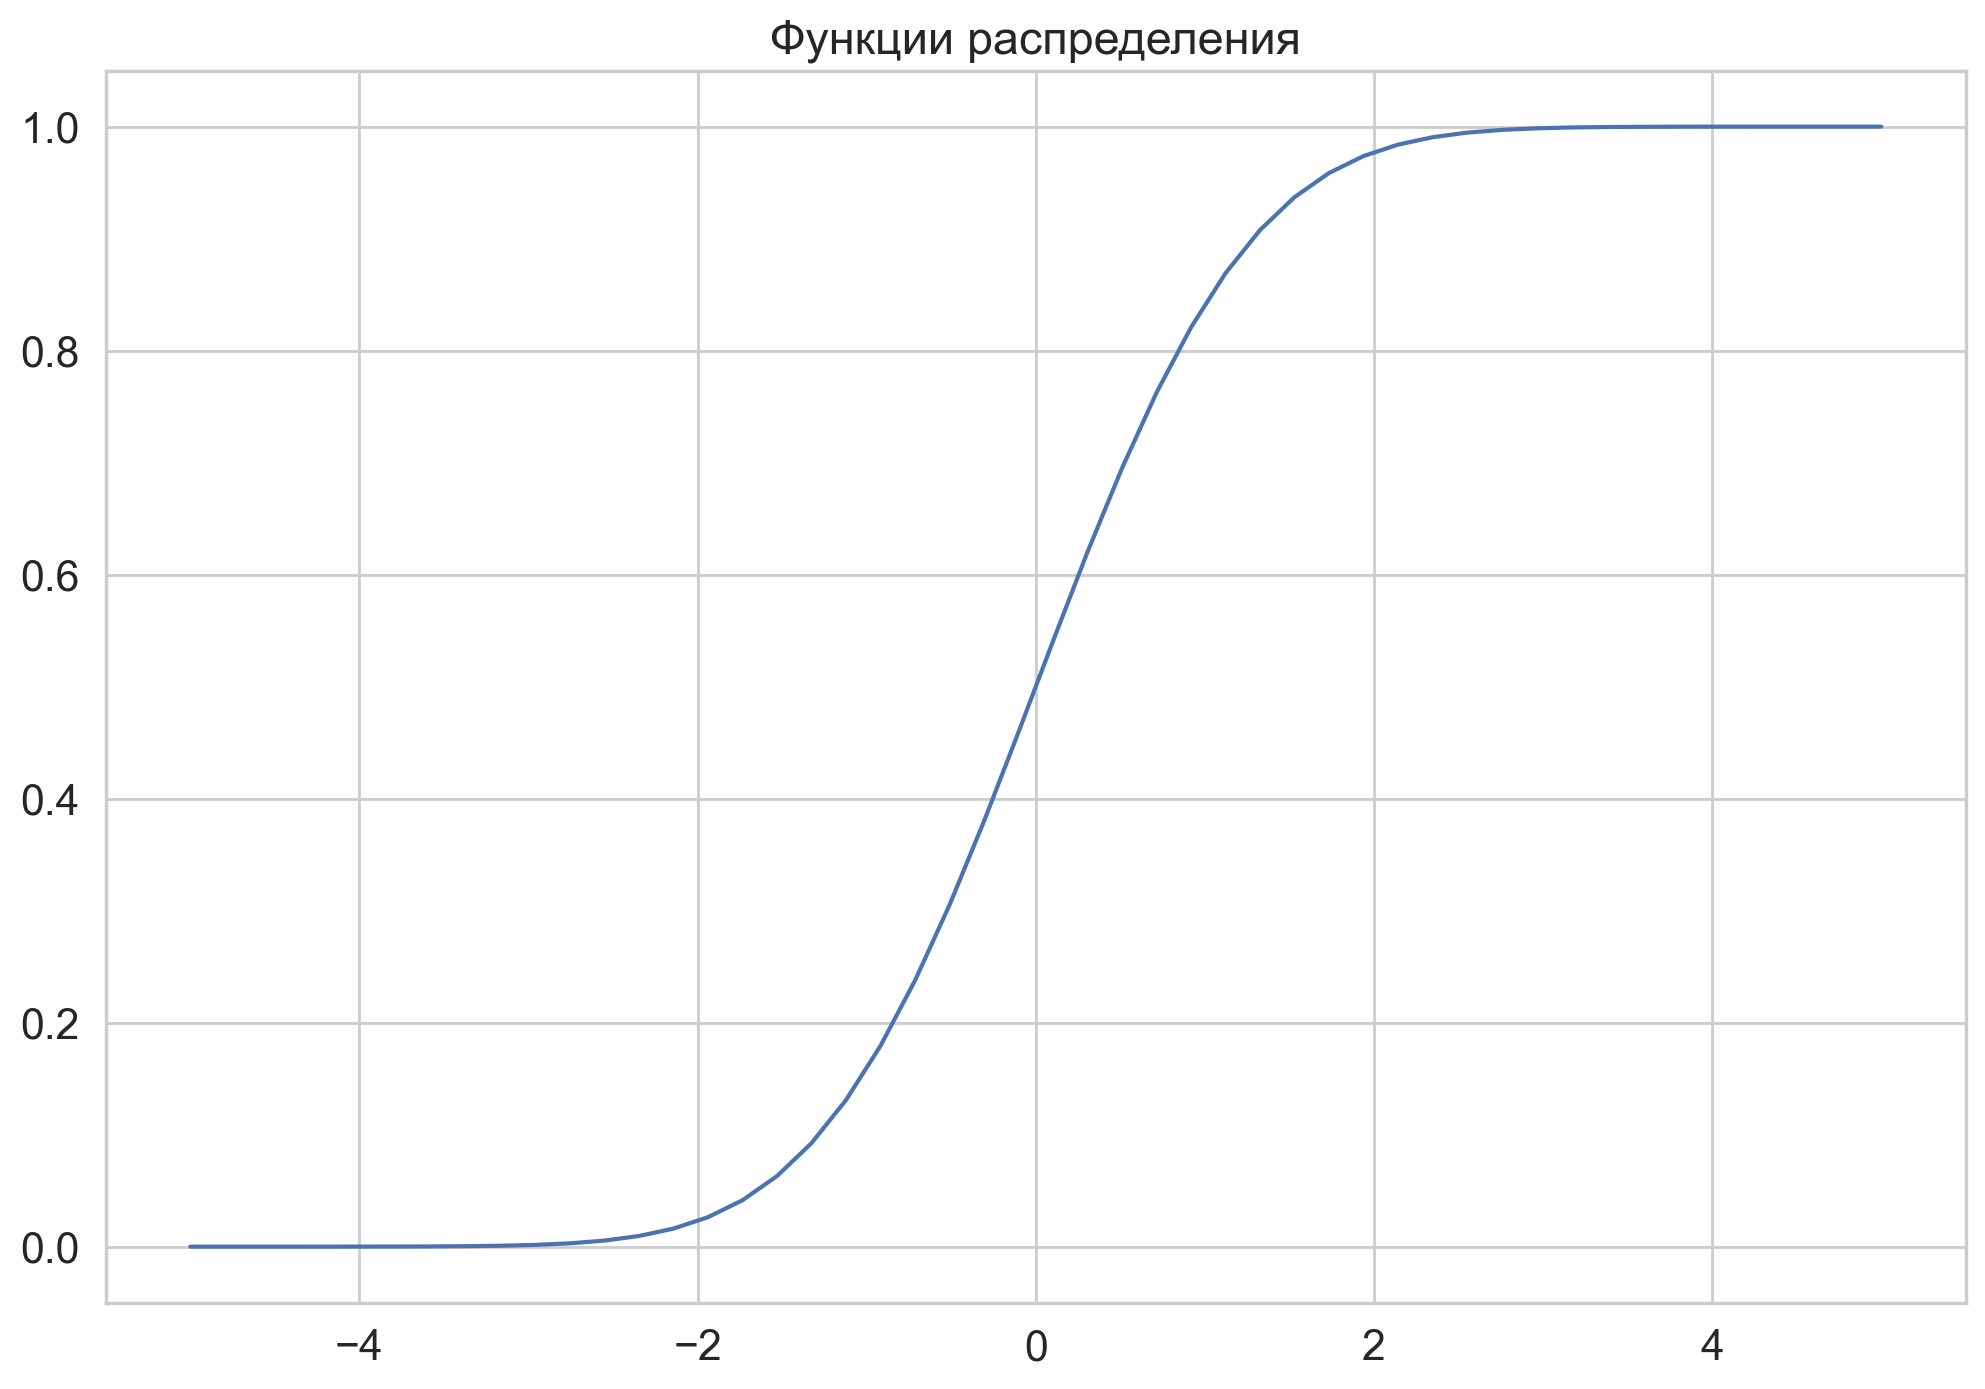

In [88]:
samples = normal.rvs((N, sample_size))
rejects = 0
for sample in samples:
    stat, p_value = sps.shapiro(sample)
    rejects += (p_value <= alpha)
    
reject_freq = rejects / N

print(f"Гипотеза о нормальности распределения отвергается в {reject_freq*100}% случаях")

### Продвинутые критерии согласия

Этот пункт бонусный (+5 баллов)

3. Проделайте действия из первой части задачи для критерия Андерсона-Дарлинга и/или Крамера-фон Мизеса-Смирнова.

In [76]:
#Ваш код здесь

### Критерий согласия Пирсона

4.1 Изучите критерий согласия Пирсона. В оригинальной постановке он работает для дискретных распределений. Предложите способ проверки при помощи него гипотез согласия для непрерывных распределений.

Ответ:

4.2 Постройте критерий согласия Пирсона для нормальных распределений. Опишите, какие квантили для распределения хи-квадрат Вам потребуются.

Ответ:

4.3. Промоделируйте статистику хи-квадрат, считая доступным только нормальное распределение (другие семплировать нельзя!).

In [77]:
#Ваш код здесь

Выполните пункты, аналогичные 2.3 и 2.4. Постарайтесь так построить критерий согласия Пирсона, чтобы параметр k был как можно больше.

In [78]:
#Ваш код здесь

### Стандартные способы проверки

5.1 Изучите критерий Шапиро-Уилка: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro

Что он проверяет? Будет ли он корректен для проверки распределения на равенство N(0, 1)?

Ответ:

Проделайте пункты, аналогичные 2.3 и 2.4 для этого критерия.

In [79]:
#Ваш код здесь

Сделайте вывод о всех выполненных частях:



##Задача 2 (10 баллов)

**Это исследовательская задача!**

### Часть 1. Одномерный хи-квадрат

Британские учёные провели ряд экспериментов по выяснению склонности людей к неравнозначному выбору стратегии в камень-ножницы-бумага. По результатам 119 экспериментальных матчей было обнаружено, что 66 человек выбирали первым камень, 39 бумагу и 14 ножницы. Используя критерий хи-квадрат выясните, существует ли статистически достоверная выигрышная стратегия выбора первого хода.

Пользоваться критерием хи-квадрат из коробки запрещено. Распределение моделировать самому (или взять квантили из прошлой задачи).

Эта задача будет оцениваться не сколько за вычисления, сколько за правильный подход к формулировке условий, методов и вывода.

1. Сформулируйте статистическую гипотезу, которую будете проверять.

2. Выберите уровень значимости и объясните выбор.

3. Посчитайте необходимые величины.

In [80]:
#Ваш код здесь

4. Дайте ответ на поставленный вопрос, чётко дав пояснение как надо играть и почему Вашему анализу можно верить. Используйте понятия "p-value", "гипотеза", "уровень значимости", "отвергать/принимать."

### Часть 2. Двумерный критерий хи-квадрат.

Критерий хи-квадрат на практике даёт простой и тем не менее самый популярный способ проверки категориальных данных на наличие зависимостей. Например, чтобы проверить, зависит ли время решения практики по статистике (в часах) от выпитого алкогольного напитка напрямую перед началом работы, поступают так: делают таблицу, где по одной размерности откладывают часы (от 1 до 5, скажем), а по другой --- напитки (пиво, вино, водка, вода,....) и в ячейку ставят число наблюдений (студентов), выпивших заданный напиток и сделавших прак за заданное число часов (ровно). И далее применяют хи-квадрат критерий (см. ниже).

Изучите пример применения обобщённого критерия хи-квадрат для проверки независимости категориальных выборок: https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data

Чтобы сразу дать практический пример, рассмотрим оценки двух случайных групп на первом курсе по последней контрольной по логике. Необходимо узнать, верно ли, что одна группа справилась лучше, чем другая (как правильно поставить гипотезу для двумерного хи-квадрат критерия подумайте сами). Подсказка: будем считать, что группы справились неодинаково, если распределение людей, решивших 1, 2, 3, 4, 5 (категориальное) в разных группах *существенно отличается* (это мы и проверяем). Эквивалентно, распределение *зависит* от группы. А вот как проверить, что какая-то группа справилась лучше решите сами.

Данные (в списке указано число задач, которое решил каждый студент):

In [81]:
group1 = [3, 4, 4, 3, 1, 1, 4, 1, 1, 0, 4, 1, 4, 4, 2, 4, 1]
group2 = [1, 3, 1, 3, 4, 3, 5, 5, 4, 2, 5, 4, 5, 4, 3, 3, 2, 3]

Сформулируйте гипотезу для критерия хи-квадрат и постройте табличную выборку.

Ответ:

In [82]:
#Ваш код здесь

Посчитайте необходимые статистики и сделайте вывод, какая группа справилась лучше с контрольной работой и значимы ли изменения. Напишите вывод с использованием терминов из темы "проверка гипотез".

## Задача 3. Корреляция.

Подопытным первокурсникам было предложено решить контрольную работу по логике и отметить по шкале от 1 до 10 своё мнение о сложности работы. Проверьте, насколько скоррелированы показатели "оценка сложности работы" и "оценка за работу".

1. Данные. Каждая строка это два числа: мнение студента о работе (от 1 до 10) и его оценка (вещественное неотрицательное число).

1 2.6

2 1.8

2 2.6

2 2.6

2 2.6

2 2.6

2 2.6

2 1.2

3 1.6

3 1.4

3 2.2

4 2.2

4 2.2

4 2.2

4 1.6

4 2.2

5 0

5 1.8

5 2.6

5 1.2

5 2.2

5 1.6

6 1.4

6 1.8

7 0.8

7 2.2

7 1

8 1.2

9 0.8

10 0.8

10 2.2

10 2.2

10 2.2

10 0


Соберите их в любой удобный вид и визуализируйте.

In [83]:
#Ваш код здесь

Посчитайте коэффициенты корреляции Пирсона и Спирмена. Отличаются ли они? Почему?

In [84]:
#Ваш код здесь

Необходимо подтвердить наличие зависимости между двумя выборками. Сформулируйте гипотезу о независимости на основании коэффициентов корреляции Пирсона и Спирмена и проверьте её на заранее выбранном Вами (обоснуйте выбор) уровне значимости.

In [85]:
#Ваш код здесь

Мы столкнулись с интересным эффектом --- гипотеза, которую мы проверяем может быть проверена двумя критериями. Давайте для простоты пока считать, что статистики критериев Пирсона и Спирмена независимы (хотя это не так, но часто бывают случаи, когда это так). Как принимать решение, если у критериев разное мнение о верности гипотезы? А если бы критериев было 3 и ответы были бы разными? Допустим, у каждого критерия ошибка первого рода ограничена уровнем значимости $\alpha$. Каким в таком случае значением ограничена вероятность ошибки первого рода хотя бы у одного из критериев?

Ответ:

На основании вопросов выше сделайте вывод о том, к как лучше всего стоит работать в случае, когда несколько критериев применяются одновременно:

На практике это называется **множественная проверка гипотез**. Можете поискать об этом информацию и написать поправку Бонферонни или любую другую. Эта часть не оценивается, но может быть интересна:

In [86]:
#Ваш код здесь

Сделайте вывод о том, есть ли всё-таки связь между мнением студента о сложности контрольной и его оценкой:

In [17]:
import numpy as np
import scipy.stats as sps


def spoil_sample(sample, x, emitter):
  size = len(sample)
  spoiled_sample = sample[int(x/2 * size) : int((1 - x/2) * size)]
  spoiled_sample = np.append(spoiled_sample, emitter)
  return spoiled_sample

alpha_grid = np.linspace(0, 0.5, 100)

def spoiled_mean_variance(sample, x_grid, emitter):
    var = []
    for x in alpha_grid:
        spoled_mean = np.mean(spoil_sample(sample, x, emitter))
        var = np.append(var, (np.mean(sample) - spoled_mean)**2)
    return var


def spoiled_median_variance(sample, x_grid, emitter):
    var = []
    for x in alpha_grid:
        spoled_median = np.median(spoil_sample(sample, x, emitter))
        var= np.append(var, (np.median(sample) - spoled_median)**2)
    return var

emitter = 100
N = 500
loc = 2
scale = 1
norm_sample = sps.norm.rvs(size=N, loc=loc, scale=scale)
laplace_sample = sps.laplace.rvs(size=N, loc=loc, scale=scale)
cauchy_sample = sps.cauchy.rvs(size=N, loc=loc, scale=scale)
samples = [norm_sample, laplace_sample, cauchy_sample]

for d in range(1):
    print(spoiled_mean_variance(np.array(samples[d]), alpha_grid, emitter))

[0.03824963 0.04084161 0.04202742 0.04315016 0.04617498 0.0466797
 0.04523247 0.04529414 0.04832147 0.05174112 0.05322468 0.0524283
 0.05411234 0.05315268 0.05406906 0.05395121 0.05258171 0.054125
 0.05348466 0.05361996 0.0504032  0.05259433 0.05452901 0.05025389
 0.04949816 0.05055634 0.05352127 0.05387899 0.05312494 0.05395657
 0.05632294 0.05947238 0.05839627 0.05830435 0.06106204 0.06494018
 0.06181195 0.06254247 0.06461194 0.06818157 0.07306023 0.0735243
 0.07202516 0.07161428 0.07276175 0.07181138 0.07577539 0.07784801
 0.07488184 0.07590628 0.07723033 0.07726134 0.07745322 0.08012026
 0.0875536  0.09235649 0.09014463 0.08876664 0.08678253 0.08942728
 0.09261064 0.09816815 0.09963481 0.10621422 0.11060902 0.10874316
 0.10936801 0.10967893 0.1125958  0.11077668 0.10868162 0.11165234
 0.10850091 0.11199495 0.11301391 0.11845538 0.12332775 0.12531428
 0.12741774 0.13213833 0.14265609 0.14186352 0.14151373 0.14043658
 0.14046482 0.13942854 0.13632924 0.14197496 0.14455168 0.14645962
